In [1]:
# Root finding problem solving.

# -- Bracketing --
# Bisection.
# Rider.
# Brent.

# -- No bracketing, but derivatives ---
# Newton.    (One dimensional)
# Newton-Raphson.    (Multi dimensional)



In [9]:
from scipy.optimize import root_scalar
# scipy.optimize.root_scalar(f, args=(), method=None, bracket=None)
import numpy as np


def f(x):
    return x/2- np.sin(x)

root_scalar(f,method='brentq', bracket=[np.pi/2,np.pi])

      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: 1.8954942670339556

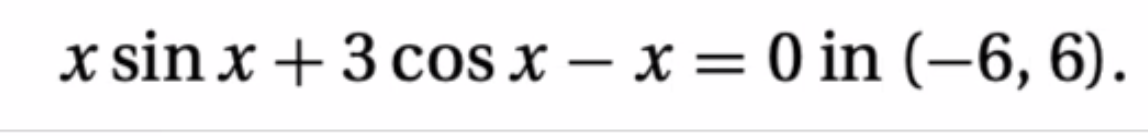

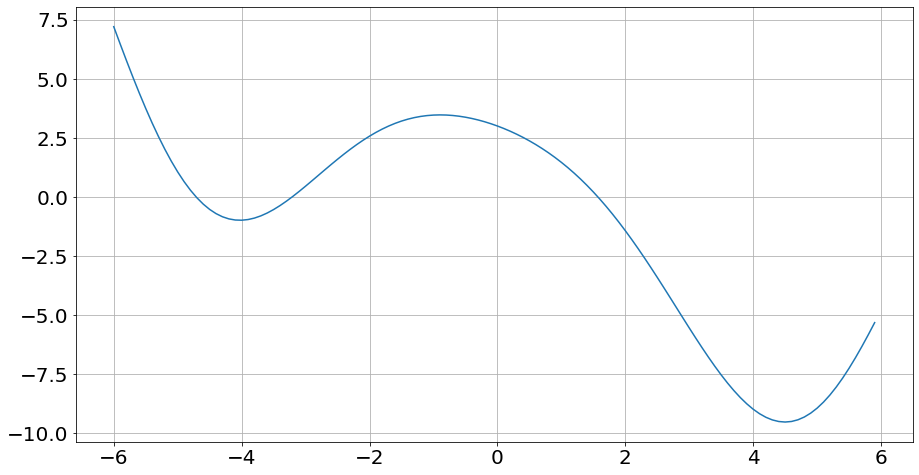

      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 11
           root: -4.71238898038469
      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: -3.2088387319804816
      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: 1.5707963267948968


In [10]:
# 모든 근을 찾으시오. 답을 찾을때 마다 Bracket을 적절히 업데이트함.
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams.update({'font.size': 20})

def f(x):
    return x*np.sin(x) + 3*np.cos(x) - x
xx = np.arange(-6,6,0.1)
plt.plot(xx,f(xx))
plt.grid()
plt.show()

print(root_scalar(f, method='brentq', bracket = [-6,-4]))
print(root_scalar(f, method='brentq', bracket = [-4,-2]))
print(root_scalar(f, method='brentq', bracket = [0,6]))

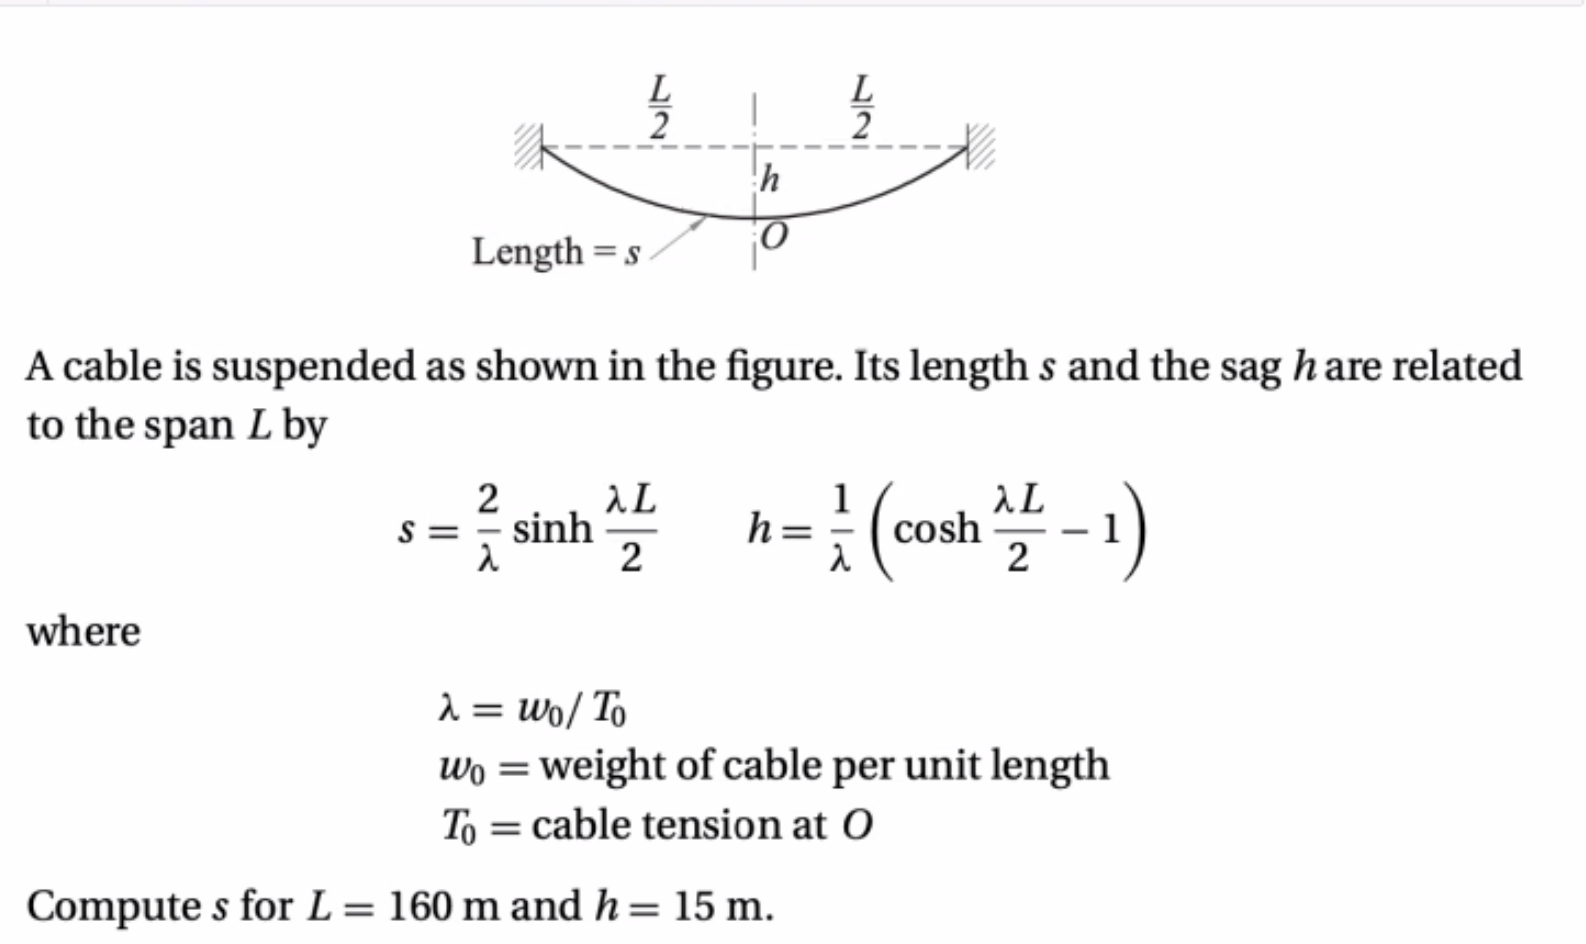

In [10]:
import numpy as np
import matplotlib.pyplot as plt
L = 160.
h = 15.

def f(lam):
    return (np.cosh(L*lam/2)-1)/lam - h

xx = np.arange(0.,0.01,0.0001)
#plt.plot(xx,f(xx))
#plt.grid()
#plt.show()

lam = root_scalar(f, method='brentq', bracket = [0.00001,0.1]).root
s = 2*np.sinh(lam*L/2)/lam
print(lam)
print(s)

0.004634177945497274
163.69044030095787


In [14]:
import numpy as np
L = 160.
h = 15.

def f(lam):
    return (np.cosh(L*lam/2)-1)/lam - h

lam = root_scalar(f, method='brentq', bracket = [0.0001,0.1]).root
s = 2*np.sinh(lam*L/2)/lam
print(s)


163.69044030095787


In [18]:
import sys
sys.path.append('../myModules/')

In [20]:
!cat ../myModules/rootsearch.py

## module rootsearch
'''  x1,x2 = rootsearch(f,a,b,dx).
    Searches the interval (a,b) in increments dx for
    the bounds (x1,x2) of the smallest root of f(x).
    Returns x1 = x2 = None if no roots were detected.
'''
from numpy import sign

def rootsearch(f,a,b,dx):
    x1 = a; f1 = f(a)
    x2 = a + dx; f2 = f(x2)
    while sign(f1) == sign(f2):
        if x1  >=  b: return None,None
        x1 = x2; f1 = f2
        x2 = x1 + dx; f2 = f(x2)
    else:
        return x1,x2


In [21]:
from rootsearch import rootsearch

In [23]:
rootsearch(f,1e-5,1,1e-8)

(0.004634169999980458, 0.004634179999980458)

In [27]:
# 가) 3.1_7.dat, y1 이라는 함수로 보간을 하여라
# 나) y1(x) = 3 의 해를 찾아라

# 함수를 그려 대략 루트가 어디에 있는지 탐색 범위를 설정
# 루트 파인더 함수를 실행하기

(1.6457509999468762, 1.6457519999468762)
      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 1.64575131106459


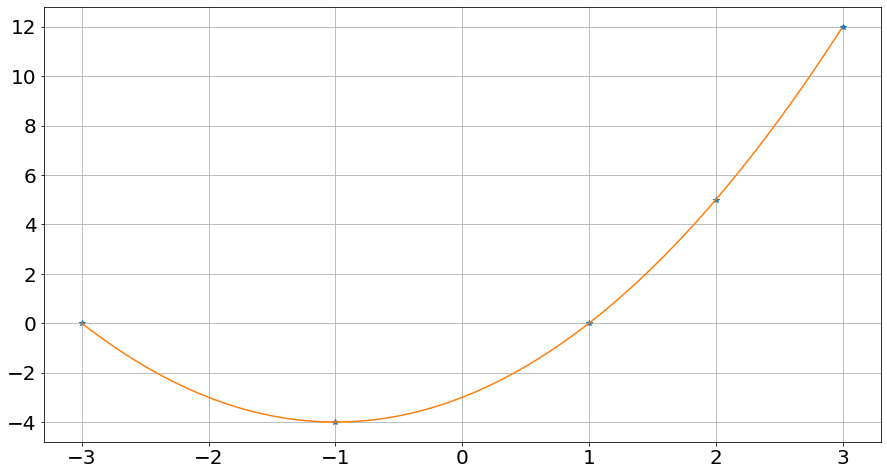

In [62]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('data/3.1_7.dat',delimiter=',')
xdata = data[0]
ydata = data[1]

pfit = np.polyfit(xdata,ydata,2)    # n, n-1, ..., 0
y1 = np.poly1d(pfit)
xx = np.arange(-3,3,0.01)

plt.plot(xdata,ydata,'*')
plt.plot(xx,y1(xx))
plt.grid()

root1 = rootsearch(y1-3,1,2,1e-6)
root2 = root_scalar(y1-3,bracket=[1,2])
print(root1)
print(root2)

In [72]:
# 가) 3.1_7.dat, y1 이라는 함수로 보간을 하여라
# 나) y1(x) = 3 의 해를 찾아라

# 함수를 그려 대략 루트가 어디에 있는지 탐색 범위를 설정
# 루트 파인더 함수를 실행하기

[-0.00256     0.00992     0.09146667 -0.31493333 -0.91050667  1.77661333
  1.8421    ]
(1.4423999999999513, 1.4424999999999513)
      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: 1.4424410873044875


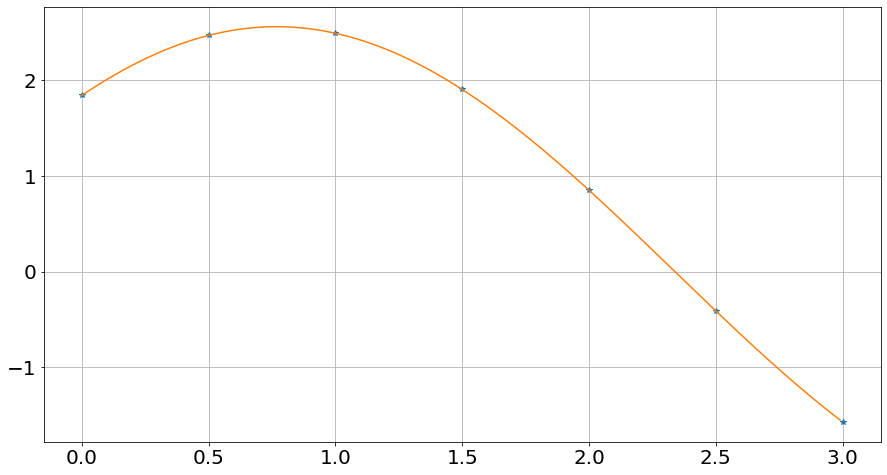

In [75]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('data/3.1_2.dat',delimiter=',')
xdata = data[0]
ydata = data[1]

pfit = np.polyfit(xdata,ydata,6)    # n, n-1, ..., 0
y1 = np.poly1d(pfit)
xx = np.arange(0,3,0.01)
print(pfit)
plt.plot(xdata,ydata,'*')
plt.plot(xx,y1(xx))
plt.grid()

root1 = rootsearch(y1-2,1,2,1e-4)
root2 = root_scalar(y1-2,bracket=[1,2])
print(root1)
print(root2)

In [76]:
def f(x):
    return x**3.0 - 10.0*x**2.0 + 5.0

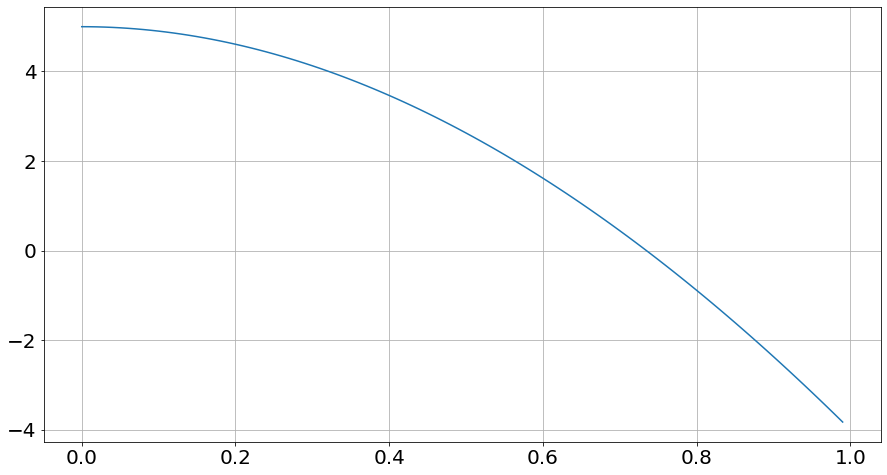

In [82]:
xx = np.arange(0,1,0.01)
plt.plot(xx,f(xx))
plt.grid()

In [115]:
start = time.time()
x1 = 0; x2 = 1
for i in range(8):
    dx = (x2 - x1)/10.0
    x1, x2 = rootsearch(f,x1,x2,dx)
end = time.time(); print('Time elapsed',end-start)
sol = (x1 + x2)/2
print('Sol ',sol)

Time elapsed 0.0005116462707519531
Sol  0.7346035050000002


In [117]:
import time
start = time.time()
ans = root_scalar(f,bracket=[0.7,0.8],xtol=1e-8)
end = time.time(); print('Time elapsed',end-start)
print('Sol ',ans.root)

Time elapsed 0.00023889541625976562
Sol  0.7346035059875746


In [118]:
# Bisection method, 이분법.

dx = dx0 / 2**n
epsilon = 1e-4

n = ln(dx/epsilon)/ln(2)
n ~ ln(dx/epsilon)

In [119]:
cat ../myModules/bisection.py

## module bisection
''' root = bisection(f,x1,x2,switch=0,tol=1.0e-9).
    Finds a root of f(x) = 0 by bisection.
    The root must be bracketed in (x1,x2).
    Setting switch = 1 returns root = None if
    f(x) increases upon bisection.
'''
import math
import error
from numpy import sign

def bisection(f,x1,x2,switch=1,tol=1.0e-9):
    f1 = f(x1)
    if f1 == 0.0: return x1
    f2 = f(x2)
    if f2 == 0.0: return x2
    if sign(f1) == sign(f2):
        error.err('Root is not bracketed')
    n = int(math.ceil(math.log(abs(x2 - x1)/tol)/math.log(2.0)))
    for i in range(n):
        x3 = 0.5*(x1 + x2); f3 = f(x3)
        if (switch == 1) and (abs(f3) > abs(f1)) \
                         and (abs(f3) > abs(f2)):
            return None

        if f3 == 0.0: return x3
        if sign(f2)!= sign(f3): x1 = x3; f1 = f3
        else: x2 = x3; f2 = f3
    return (x1 + x2)/2.0



In [127]:
from bisection import bisection

x1 = 0; x2 = 1
start = time.time()
bisection(f,x1,x2,switch=1,tol=1.0e-9)
end = time.time(); print('Time elapsed',end-start)
print('Sol ',sol)

Time elapsed 0.00035858154296875
Sol  0.7346035050000002


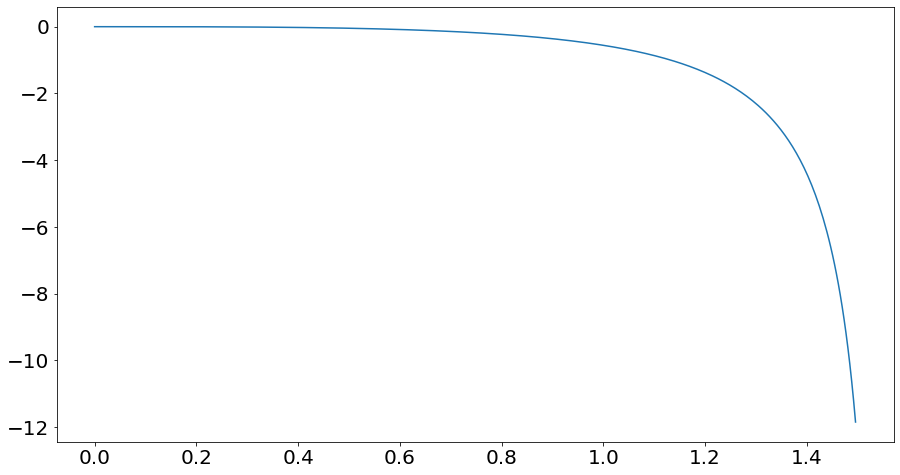

In [140]:
# x - tan(x) root 찾기 

def f(x):
    return x - np.tan(x)

xx = np.linspace(0,np.pi/2.1,400)
plt.plot(xx,f(xx))
#plt.plot(xx,np.tan(xx))

In [141]:
rootsearch(np.tan,1,2,0.001)

(1.5699999999999372, 1.5709999999999371)

In [153]:
sol = bisection(np.tan,1,2,switch=1,tol=1.0e-9)
print(sol)

None


In [160]:
# 0 에서 30까지 tan(x)의 모든 루트를 찾으시오

def f(x):
    return np.tan(x)

a,b,dx = (0, 30, 0.001)

while True:
    x1, x2 = rootsearch(f,a,b,dx)
    if x1 != None:
        a = x2
        rootval = bisection(f,x1,x2,1)
        if rootval != None:
            print('Root ', rootval)
    else:
        break

Root  0
Root  3.141592653751138
Root  6.283185307026343
Root  9.424777960300661
Root  12.566370614527127
Root  15.707963267799922
Root  18.84955592107778
Root  21.991148575309836
Root  25.132741228588202
Root  28.274333881866575


In [166]:
# -20 에서 0까지 x - tan(x)의 모든 루트를 찾으시오

def f(x):
    return x - np.tan(x)

a,b,dx = (-20, 0, 0.001)

while True:
    x1, x2 = rootsearch(f,a,b,dx)
    if x1 != None:
        a = x2
        rootval = bisection(f,x1,x2,1)
        if rootval != None:
            print('Root ', rootval)
    else:
        break

Root  -17.220755272385063
Root  -14.066193912979127
Root  -10.904121659753642
Root  -7.7252518372530234
Root  -4.493409457681938
Root  1.4598253161857144e-12
Root  1.4598253161857144e-12


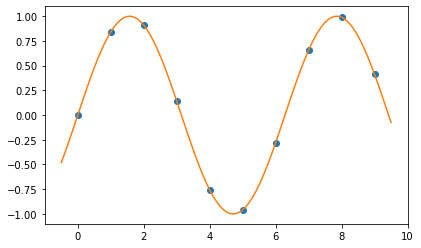

In [2]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html

import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
x = np.arange(10)
y = np.sin(x)

cs = CubicSpline(x,y)


xs = np.arange(-0.5,9.6,0.1)
fig, ax = plt.subplots(figsize=(6.5,4))
ax.plot(x,y,'o',label='data')
ax.plot(xs,np.sin(xs),label='true')

ax.plot(xs, cs(xs),label='S')
ax.plto

In [3]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html

theta = 2*np.pi*np.linspace(0,1,5)
y = np.c_[np.cos(theta),np.sin(theta)]
cs = CubicSpline(theta, y, bc_type='periodic')

print("ds/dx={:.1f} ds")

ds/dx={:.1f} ds


In [4]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html

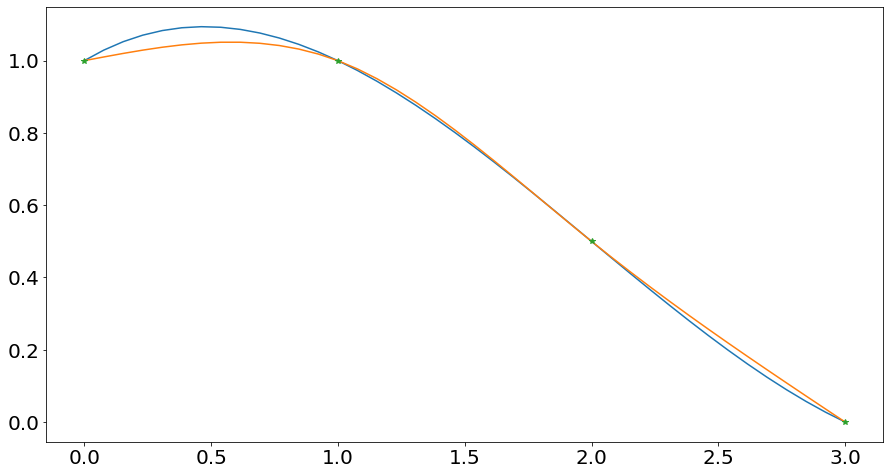

In [14]:
xx = [0.,1.,2.,3.]
yy =[1.,1.,0.5,0.]

cs = CubicSpline(xx,yy)
x = np.linspace(0,3,40)

csn = CubicSpline(xx,yy,bc_type=((2,0),(2,0)))
plt.plot(x,cs(x))
plt.plot(x,csn(x))
plt.plot(xx,yy,'*')

In [15]:
def fun(x):
    return [x[0]  + 0.5 * (x[0] - x[1])**3 - 1.0,
            0.5 * (x[1] - x[0])**3 + x[1]]

def jac(x):
    return np.array([[1 + 1.5 * (x[0] - x[1])**2,
                      -1.5 * (x[0] - x[1])**2],
                     [-1.5 * (x[1] - x[0])**2,
                      1 + 1.5 * (x[1] - x[0])**2]])

from scipy import optimize
sol = optimize.root(fun, [0, 0], jac=jac, method='hybr')
sol.x

array([0.8411639, 0.1588361])

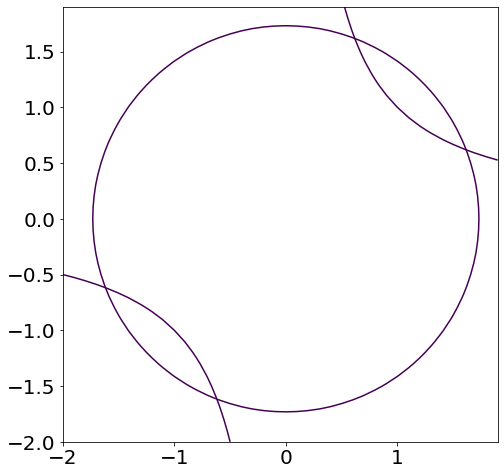

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# x^2 + y^2 - 3 = 0
# x*y - 1 = 0 

# f(x)
lim = 2.0
delta = 0.1
xdata = np.arange(-lim,lim,delta)
ydata= np.arange(-lim,lim,delta)
X, Y = np.meshgrid(xdata,ydata)


def f1(x,y):
    return x**2.0 + y**2.0 - 3

def f2(x,y):
    return x*y - 1

F1 = f1(X,Y)
F2 = f2(X,Y)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')

plt.contour(X,Y,F1,[0])
plt.contour(X,Y,F2,[0])

In [29]:
# root(func,xini)
def func(x):
    return [f1(x[0],x[1]),f2(x[0],x[1])]

x0 = [1,0]

from scipy.optimize import root

sol = root(func,x0)
sol.x
func(sol.x)


[0.0, 2.220446049250313e-16]

In [ ]:
x0 = [1,1]    # 초기값. 다음 문제의 근을 찾으시오

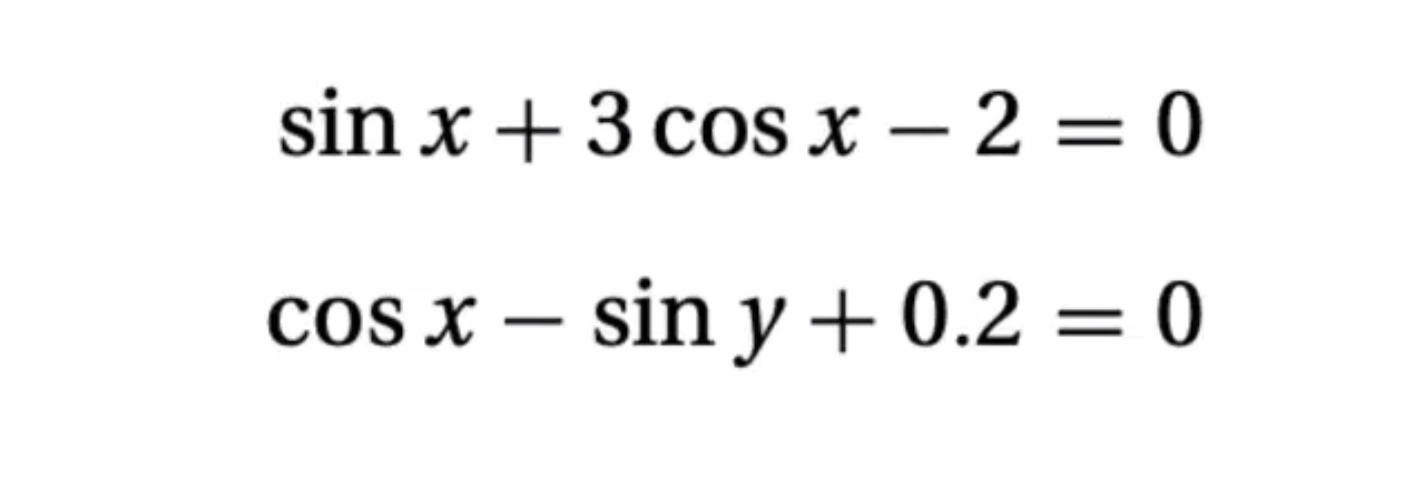

[-2.6645352591003757e-15, -3.7192471324942744e-15]

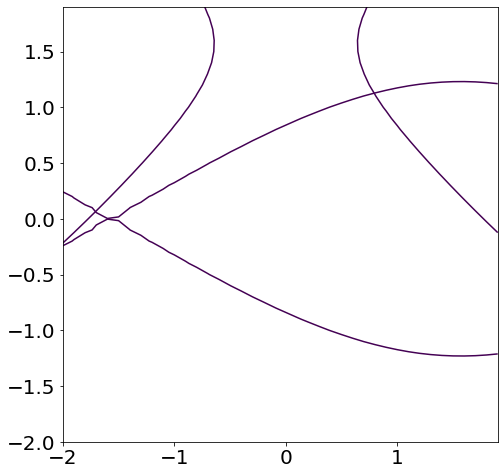

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# x^2 + y^2 - 3 = 0
# x*y - 1 = 0 

# f(x)
lim = 2.0
delta = 0.1
xdata = np.arange(-lim,lim,delta)
ydata= np.arange(-lim,lim,delta)
X, Y = np.meshgrid(xdata,ydata)


def f1(x,y):
    return np.sin(x) + 3*np.cos(y) - 2

def f2(x,y):
    return np.cos(x) - np.sin(y) + 0.2

F1 = f1(X,Y)
F2 = f2(X,Y)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')

plt.contour(X,Y,F1,[0])
plt.contour(X,Y,F2,[0])
# root(func,xini)

def func(x):
    return [f1(x[0],x[1]),f2(x[0],x[1])]

x0 = [1,1]

from scipy.optimize import root

sol = root(func,x0)
sol.x
func(sol.x)

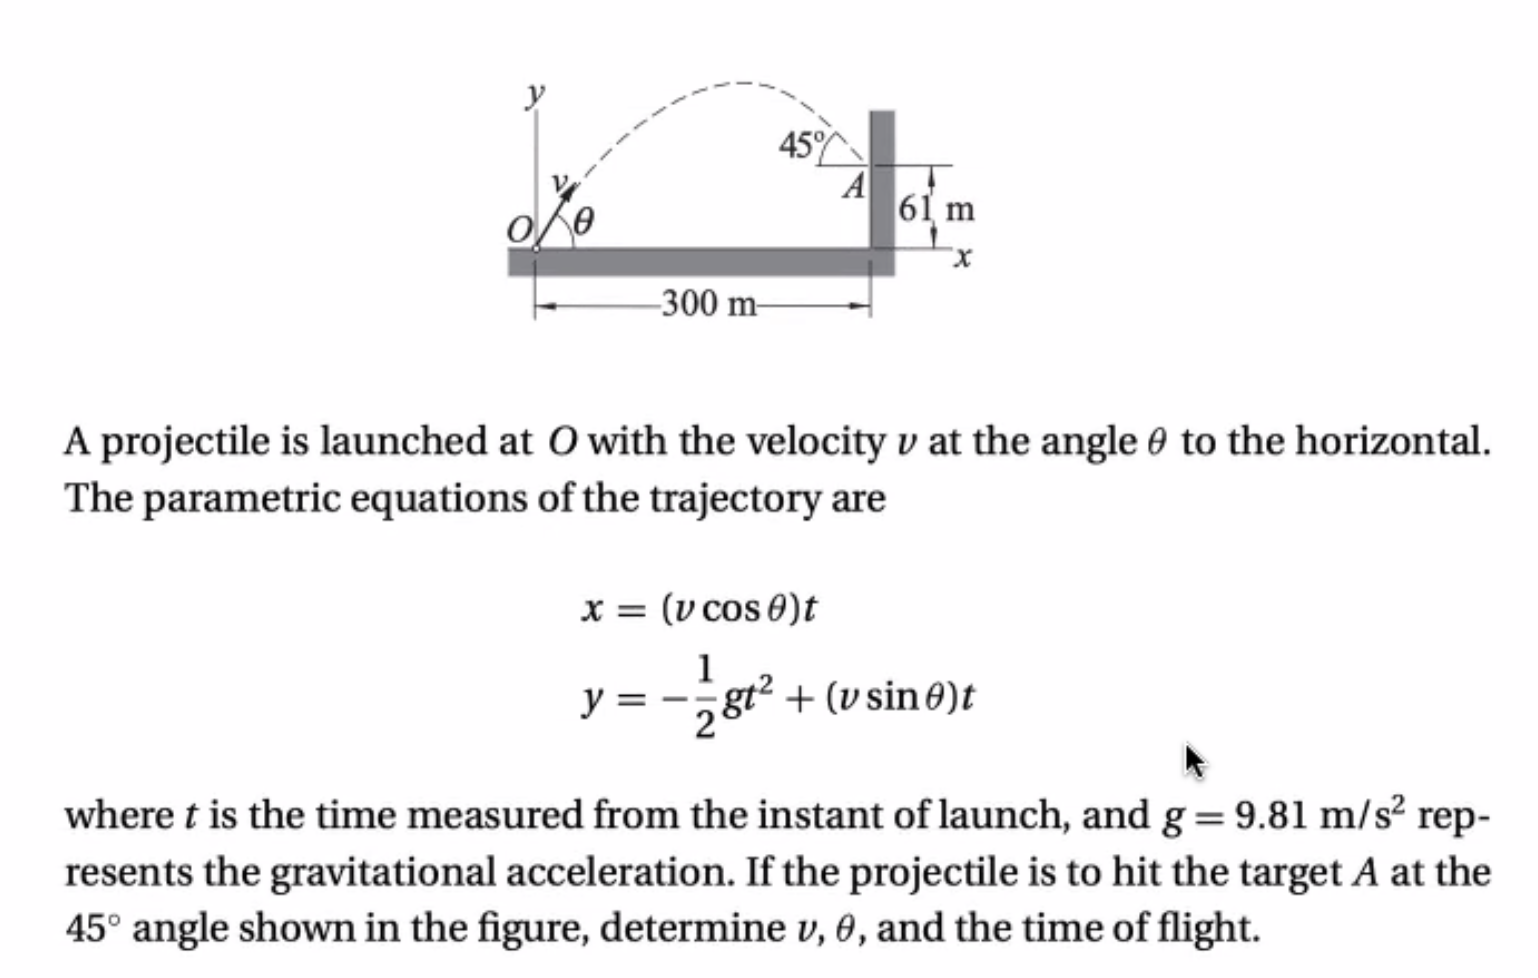